In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lne

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/homeprices.csv')
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


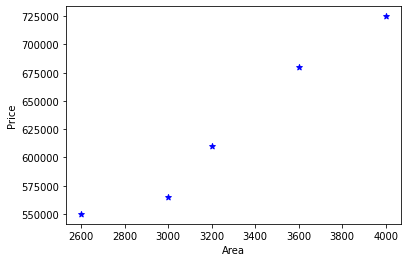

In [3]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.area,data.price,color='Blue',marker='*')

In [4]:
newData=data.drop('price',axis='columns')
newData

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price=data.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
reg=lne.LinearRegression()
reg.fit(newData,price)

LinearRegression()

In [7]:
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [8]:
reg.predict([[1000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([316404.10958904])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [11]:
#y=mx+c

In [12]:
1000*135.78767123+180616.43835616432

316404.10958616436

In [13]:
dataArea=pd.read_csv('/content/drive/MyDrive/Machine Learning/areas.csv')
dataArea

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [14]:
dataArea.head(3)

,area
0,1000
1,1500
2,2300


In [15]:
p=reg.predict(dataArea)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
dataArea['price']=p
dataArea

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
dataSal=pd.read_csv('/content/drive/MyDrive/Machine Learning/Salary.csv')
x=dataSal.iloc[:,:-1].values
y=dataSal.iloc[:,1].values
dataSal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [18]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [19]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


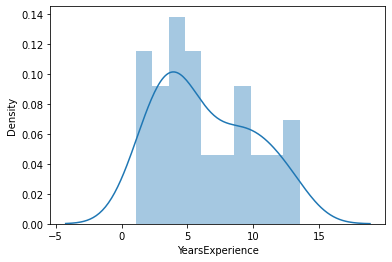

In [21]:
sns.distplot(dataSal['YearsExperience'],kde=True,bins=10)

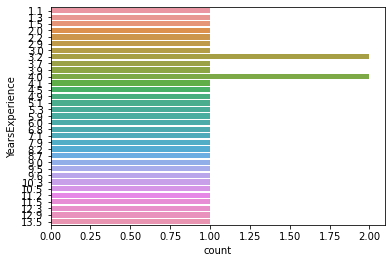

In [22]:
sns.countplot(y='YearsExperience',data=dataSal)

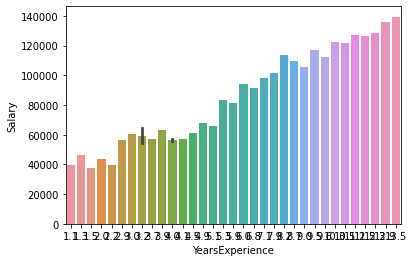

In [23]:
sns.barplot(x='YearsExperience',y='Salary', data=dataSal)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression as LR
lr=LR()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(X_test)
y_pred

array([121240.47035944,  89080.02163531,  74303.59924855, 119502.06772571,
        98641.23612087,  72565.19661482,  63873.18344613,  43012.35184129,
        64742.384763  , 113417.65850763, 108202.45060642, 147316.50986549])

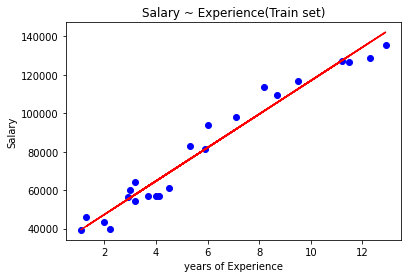

In [27]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary ~ Experience(Train set)')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()

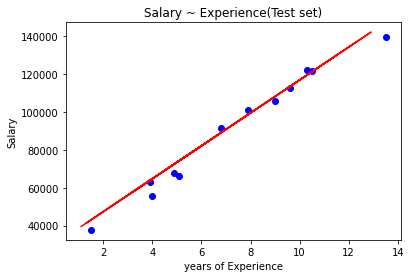

In [28]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary ~ Experience(Test set)')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 3990.0449210006386
MSE: 24190855.78256977
RMSE: 63.1668023648549
